In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data_spb = pd.read_csv('stoma_dataset.csv')
data_spb['region'] = 'Saint-Petersburg'
data_sev_kav = pd.read_csv('stoma_dataset_sev_kav.csv')
data_sev_kav['region'] = 'Severny Kavkaz'
data_tula = pd.read_csv('stoma_dataset_tula.csv')
data_tula['region'] = 'Tula'
data_tyumen = pd.read_csv('stoma_dataset_tumen.csv')
data_tyumen['region'] = 'Tyumen'

In [3]:
data = pd.concat([data_spb, data_sev_kav, data_tula, data_tyumen], axis=0)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


# Распределение наблюдений по городам

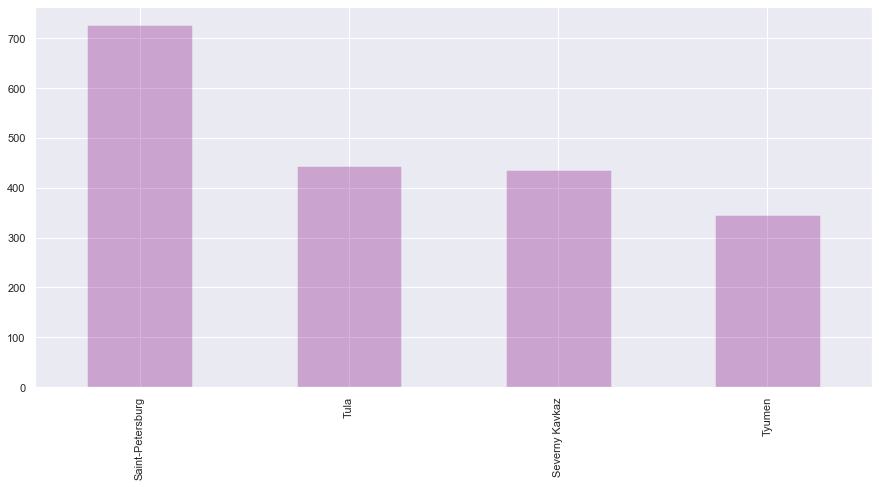

In [21]:
plt.figure(figsize=(15, 7))
data['region'].value_counts().plot(kind='bar', alpha=0.3, color='purple')

### Чистим данные от пропусков за определенные годы 

In [4]:
data.drop(data[data['not_registered']==28].index, axis=0, inplace=True)

### Рассчитываем КПУ

In [5]:
data['kpu'] = data[['num_caries', 'num_filling_caries',
                    'num_filling_no_caries', 
                    'num_removed_caused_by_caries', 'num_removed_other_reasons']].sum(axis=1)

### Рассчитываем процент КПУ для нормирования

In [6]:
def divide(a):
    return a/28.

In [7]:
data['kpu_%'] = data['kpu'].apply(lambda a: divide(a))

# Динамика абсолютного значения КПУ по годам во всех городах

### На графике наблюдаем рост КПУ со временем, однако, это обсусловено ростом числа пациентов и и оцифрованных данных

Text(0.5, 1.0, 'Индекс КПУ по годам, абсолютное значение')

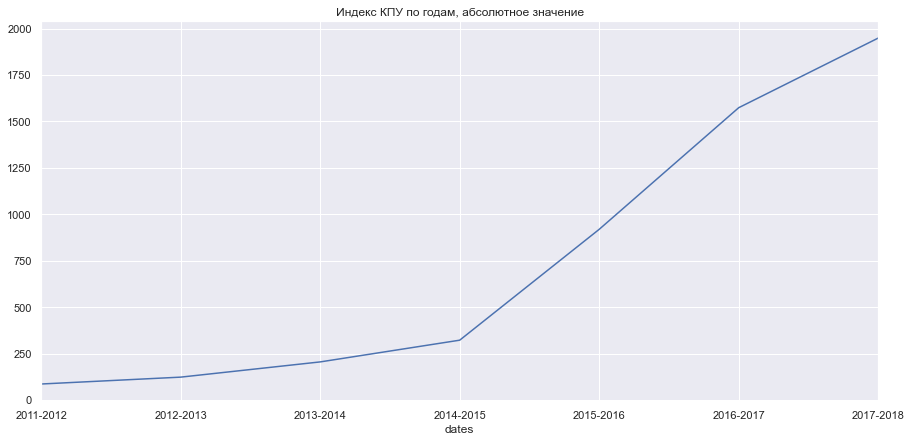

In [8]:
years_sum = data.groupby('dates').sum()
plt.figure(figsize=(15, 7))
years_sum['kpu'].plot()
plt.title('Индекс КПУ по годам, абсолютное значение')

# Динамика абсолютного значения КПУ по городам

### Отдельно в каждом городе также наблюдаем положительную динамику КПУ

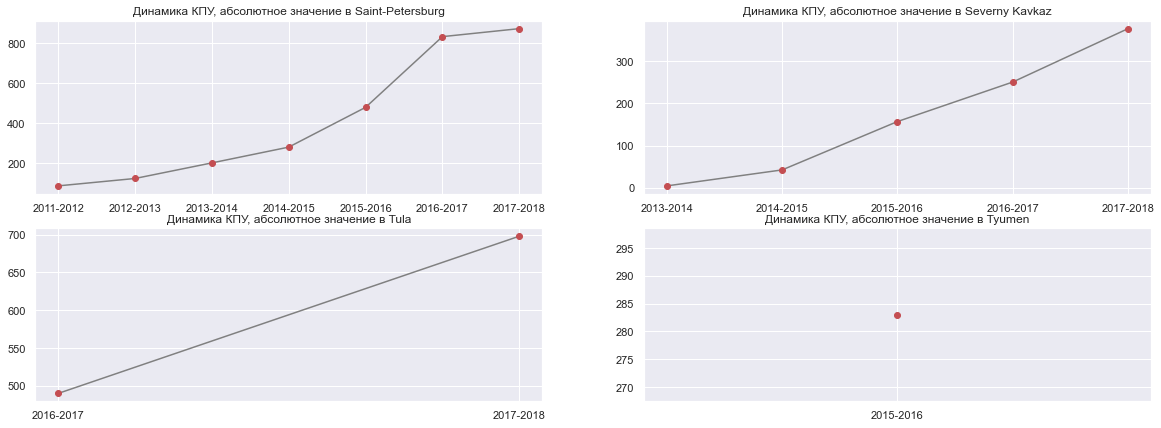

In [10]:
regions = ['Saint-Petersburg', 'Severny Kavkaz', 'Tula', 'Tyumen']
num_graphs = list(range(3))
column = 'kpu'
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,7))
counter = 0
for row in [0, 1]:
    for col in [0, 1]:
        df = data[data['region']==regions[counter]]
        years_sum = df.groupby('dates').sum()
        ax[row][col].set_title(f'Динамика КПУ, абсолютное значение в {regions[counter]}')
        ax[row][col].plot(years_sum[column], color='grey')
        ax[row][col].plot( years_sum[column], 'ro',)
        counter += 1


# Нормируем КПУ на количество всех пациентов

Точнее на количество суммарных зубов у всех пациентов

In [11]:
def divide_all_teeth(kpu, counts):
    res = kpu/(counts*28)
    return res

### Наблюдаем положительную динамику процента КПУ с 2011 по 2015 год, в 2015-2016 резкий спад, и снова рост в оставшийся период

Text(0.5, 1.0, 'Индекс КПУ по годам,нормированный на количество пациентов')

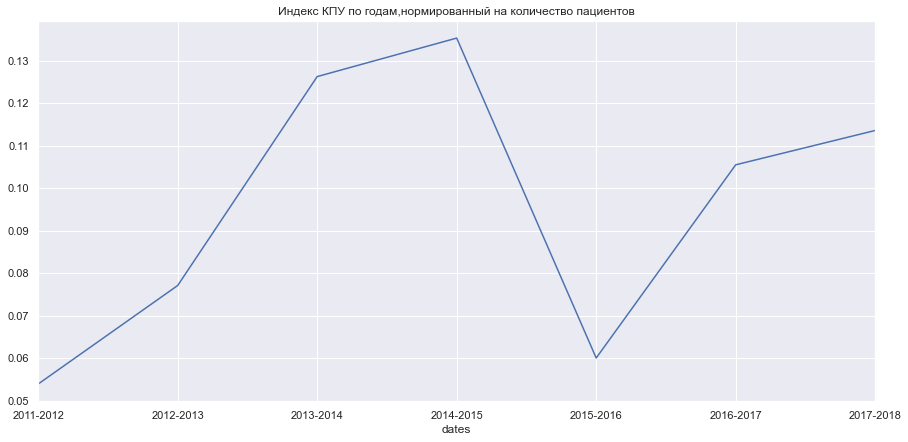

In [12]:
years_sum = data.groupby('dates').sum()
years_sum['counts'] = data['dates'].value_counts().sort_index()
years_sum['all_teeth_kpu'] = years_sum[['kpu', 'counts']].apply(lambda a: divide_all_teeth(a[0], a[1]), axis=1)
plt.figure(figsize=(15, 7))
years_sum['all_teeth_kpu'].plot()
plt.title('Индекс КПУ по годам,нормированный на количество пациентов')

### Из анализа данных в отдельных городах видим, что спад 2015-2016 гг обусловлен новыми данными из Северного Кавказа, в СПб продолжается положительная динамика на протяжение всего периода сбора данных. В Туле и Тюмени данных мало.

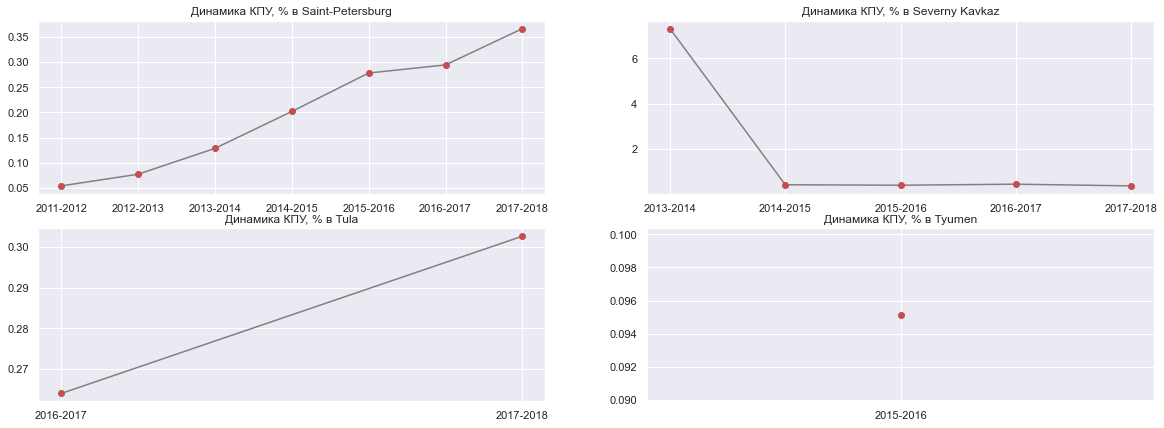

In [13]:
regions = ['Saint-Petersburg', 'Severny Kavkaz', 'Tula', 'Tyumen']
num_graphs = list(range(3))
column = 'all_teeth_kpu'
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,7))
counter = 0
for row in [0, 1]:
    for col in [0, 1]:
        df = data[data['region']==regions[counter]]
        years_sum['counts'] = df['dates'].value_counts().sort_index()
        years_sum['all_teeth_kpu'] = years_sum[['kpu', 'counts']].apply(lambda a: divide_all_teeth(a[0], a[1]), axis=1)
        ax[row][col].set_title(f'Динамика КПУ, % в {regions[counter]}')
        ax[row][col].plot(years_sum[column], color='grey')
        ax[row][col].plot( years_sum[column], 'ro',)
        counter += 1

# Медианный Индекс КПУ по годам, относительное значение

### Возможно, в данных есть аномалии (пациенты со слишком большим КПУ, которые могут смещать среднее значение). Поэтому используем далее не средний, а медианный КПУ

Text(0.5, 1.0, 'Медианный Индекс КПУ по годам, относительное значение (%)')

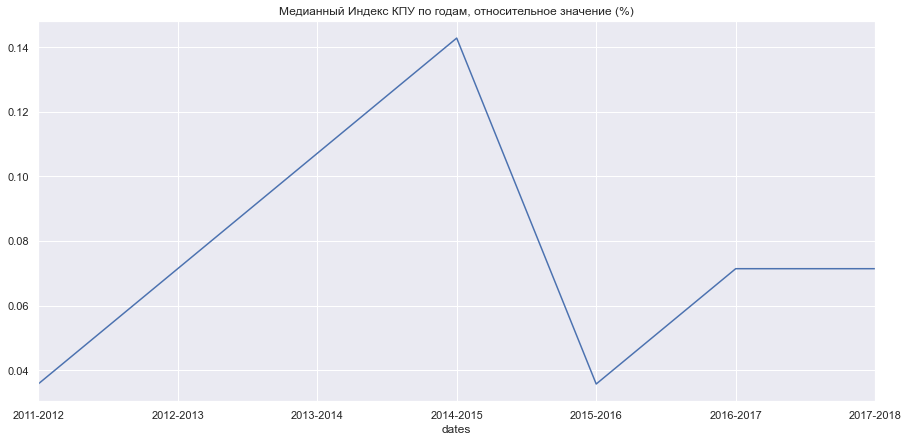

In [14]:
years_median = data.groupby('dates').median()
plt.figure(figsize=(15, 7))
years_median['kpu_%'].plot()
plt.title('Медианный Индекс КПУ по годам, относительное значение (%)')

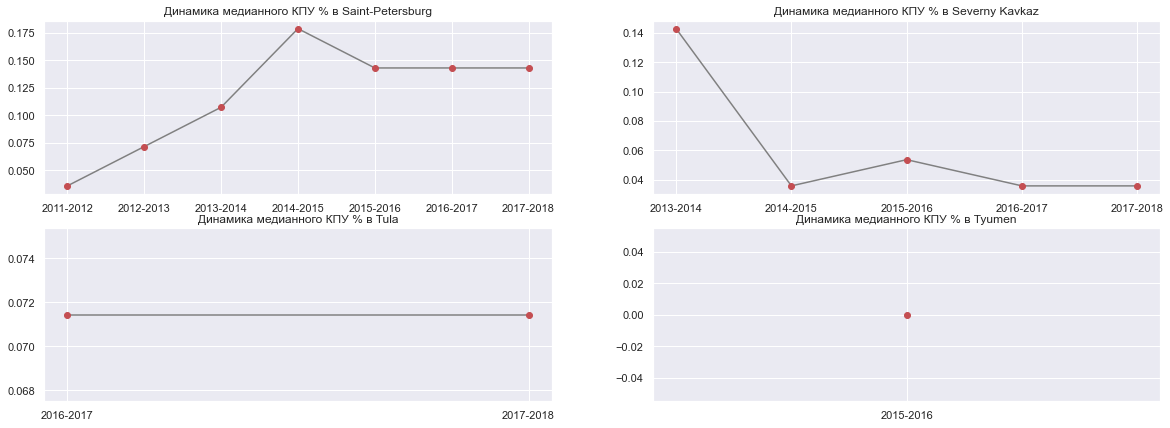

In [15]:
regions = ['Saint-Petersburg', 'Severny Kavkaz', 'Tula', 'Tyumen']
num_graphs = list(range(3))
column = 'kpu_%'
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,7))
counter = 0
for row in [0, 1]:
    for col in [0, 1]:
        df = data[data['region']==regions[counter]]
        years_median = df.groupby('dates').median()
        ax[row][col].set_title(f'Динамика медианного КПУ % в {regions[counter]}')
        ax[row][col].plot(years_median[column], color='grey')
        ax[row][col].plot( years_median[column], 'ro',)
        counter += 1

# Анализ отдельных компонент показателя КПУ - Кариес, Пломба, Удаление

## Процент зубов с кариесом без пломб

### В целом, динамика процента зубов с кариесным поражением схожа с КПУ

Text(0.5, 1.0, '% кариеса без пломб по годам во всех городах')

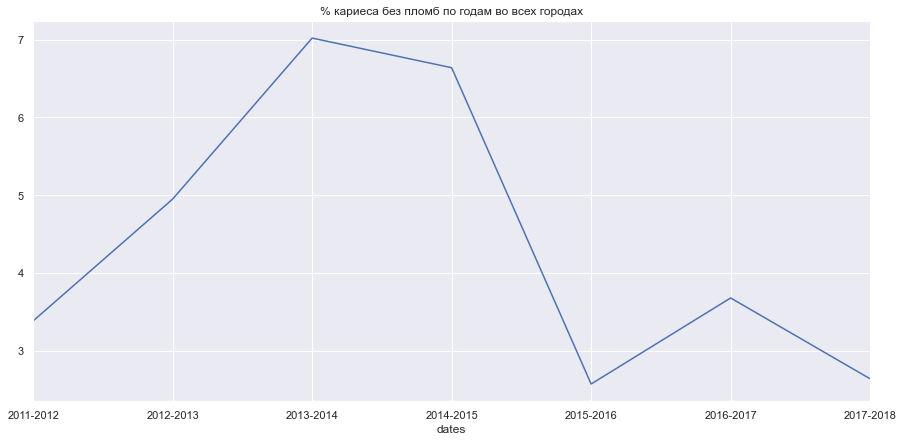

In [22]:
years_sum = data.groupby('dates').sum()
years_sum['counts'] = data['dates'].value_counts().sort_index()
years_sum['all_teeth_caries'] = years_sum[['num_caries', 'counts']].apply(lambda a: divide_all_teeth(a[0], a[1])*100, axis=1)
plt.figure(figsize=(15, 7))
years_sum['all_teeth_caries'].plot()
plt.title('% кариеса без пломб по годам во всех городах')

### В Спб также видим отрицательную динамику в проценте кариесных зубов без пломб, показатель значительно уменьшился с 7 до 1,3 процента и продолжает колебаться в промежутке 1-2 процента до 2018 года

### На Северном Кавказе, в среднем показатель ниже, чем в остальных регионах, однако, на протяжение четырх последних лет он колеблется от 0.4 до 0.6 процентов.

### В Туле наблюдаем уменьшение показателся с 1.15% до 0.95 % за два года

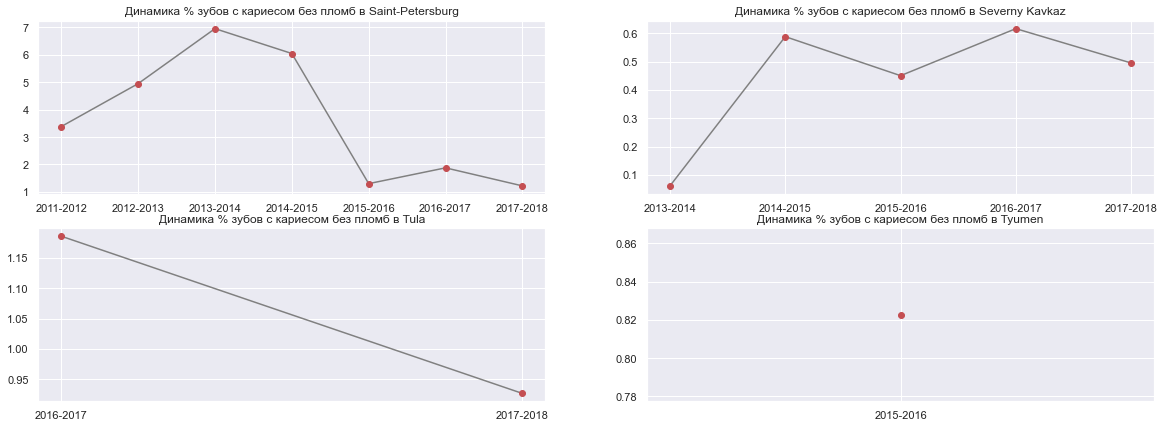

In [125]:
regions = ['Saint-Petersburg', 'Severny Kavkaz', 'Tula', 'Tyumen']
num_graphs = list(range(3))
column = 'all_teeth_caries'
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,7))
counter = 0
for row in [0, 1]:
    for col in [0, 1]:
        df = data[data['region']==regions[counter]]
        years_sum = df.groupby('dates').sum()
        years_sum['counts'] = data['dates'].value_counts().sort_index()
        years_sum['all_teeth_caries'] = years_sum[['num_caries', 'counts']].apply(lambda a: divide_all_teeth(a[0], a[1])*100, axis=1)

        ax[row][col].set_title(f'Динамика % зубов с кариесом без пломб в {regions[counter]}')
        ax[row][col].plot(years_sum[column], color='grey')
        ax[row][col].plot( years_sum[column], 'ro',)
        counter += 1

## Процент зубов с кариесом и пломбами

Text(0.5, 1.0, 'Доля зубов с кариесом и пломбами')

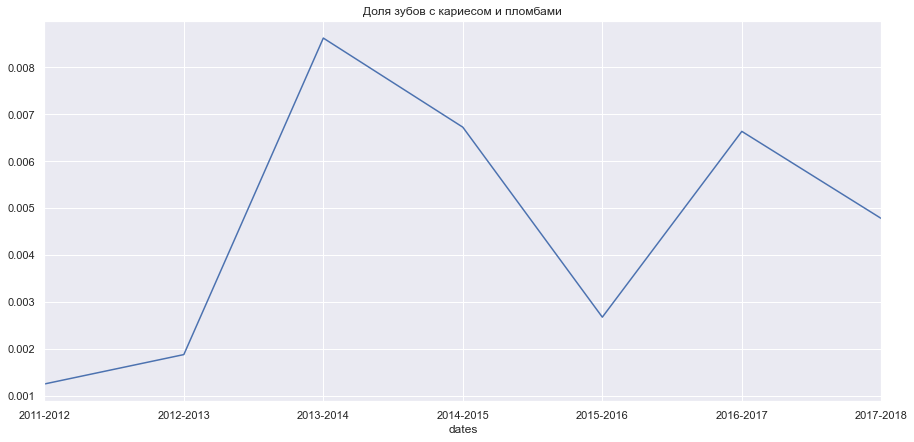

In [41]:
years_sum = data.groupby('dates').sum()
years_sum['counts'] = data['dates'].value_counts().sort_index()
years_sum['all_teeth_filling_caries'] = years_sum[['num_filling_caries', 'counts']].apply(lambda a: divide_all_teeth(a[0], a[1]), axis=1)
plt.figure(figsize=(15, 7))
years_sum['all_teeth_filling_caries'].plot()
plt.title('Доля зубов с кариесом и пломбами')

### Почему-то показатель с непломбированным кариесом есть только за 2015-2016 год и то не во всех городах

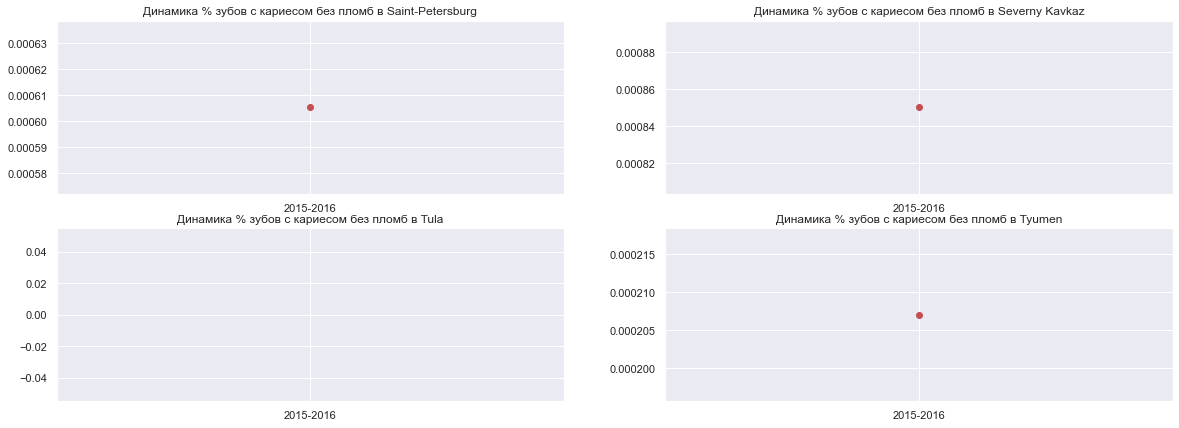

In [130]:
regions = ['Saint-Petersburg', 'Severny Kavkaz', 'Tula', 'Tyumen']
num_graphs = list(range(3))
column = 'all_teeth_filling_caries'
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,7))
counter = 0
for row in [0, 1]:
    for col in [0, 1]:
        df = data[data['region']==regions[counter]]
        years_sum['counts'] = df['dates'].value_counts().sort_index()
        years_sum['all_teeth_filling_caries'] = years_sum[['num_filling_caries', 'counts']].apply(lambda a: divide_all_teeth(a[0], a[1]), axis=1)
        ax[row][col].set_title(f'Динамика % зубов с кариесом без пломб в {regions[counter]}')
        ax[row][col].plot(years_sum[column], color='grey')
        ax[row][col].plot( years_sum[column], 'ro',)
        counter += 1

## Процент зубов без кариеса с пломбами

### В целом наблюдаем рост пломбированных зубов с небольшим падением в 2015-2016-м году, что обусловленно появлением новых данных из Северного Кавказа.

Text(0.5, 1.0, '% пломб по годам, рассчитано для всех зубов с пломбами без кариеса')

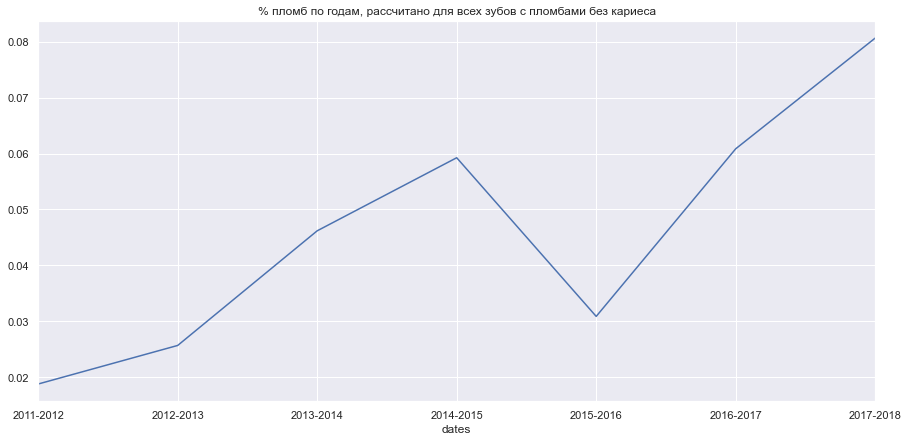

In [131]:
years_sum = data.groupby('dates').sum()
years_sum['counts'] = data['dates'].value_counts().sort_index()
years_sum['all_teeth_filling_no_caries'] = years_sum[['num_filling_no_caries', 'counts']].apply(lambda a: divide_all_teeth(a[0], a[1]), axis=1)
plt.figure(figsize=(15, 7))
years_sum['all_teeth_filling_no_caries'].plot()
plt.title('% пломб по годам, рассчитано для всех зубов с пломбами без кариеса')


### В Спб и Туле наблюдаем рост зубов без кариеса с пломбой, в Сев. Кавказе - наоборот, падение

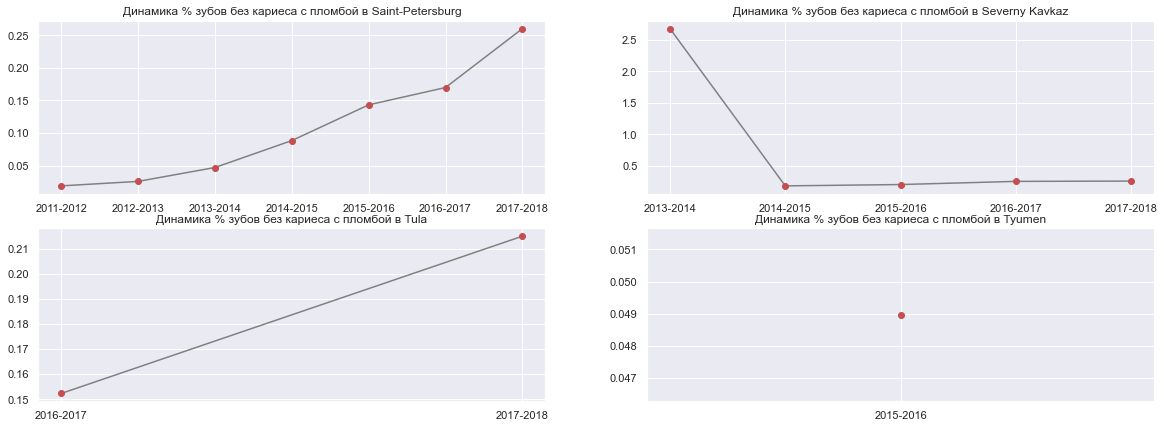

In [133]:
regions = ['Saint-Petersburg', 'Severny Kavkaz', 'Tula', 'Tyumen']
num_graphs = list(range(3))
column = 'all_teeth_filling_no_caries'
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,7))
counter = 0
for row in [0, 1]:
    for col in [0, 1]:
        df = data[data['region']==regions[counter]]
        years_sum['counts'] = df['dates'].value_counts().sort_index()
        years_sum['all_teeth_filling_no_caries'] = years_sum[['num_filling_no_caries', 'counts']].apply(lambda a: divide_all_teeth(a[0], a[1]), axis=1)
        ax[row][col].set_title(f'Динамика % зубов без кариеса с пломбой в {regions[counter]}')
        ax[row][col].plot(years_sum[column], color='grey')
        ax[row][col].plot( years_sum[column], 'ro',)
        counter += 1

# Доля удаленных зубов из-за кариеса

### В целом, доля удаленных зубов низкая, пик приходится на 2014-2015-й год, затем падение в 2015-2016 за счет Сев. Кавказа и снова рост с 2016 по 2018 годы

Text(0.5, 1.0, 'Доля удаленных зубов из-за кариеса по годам')

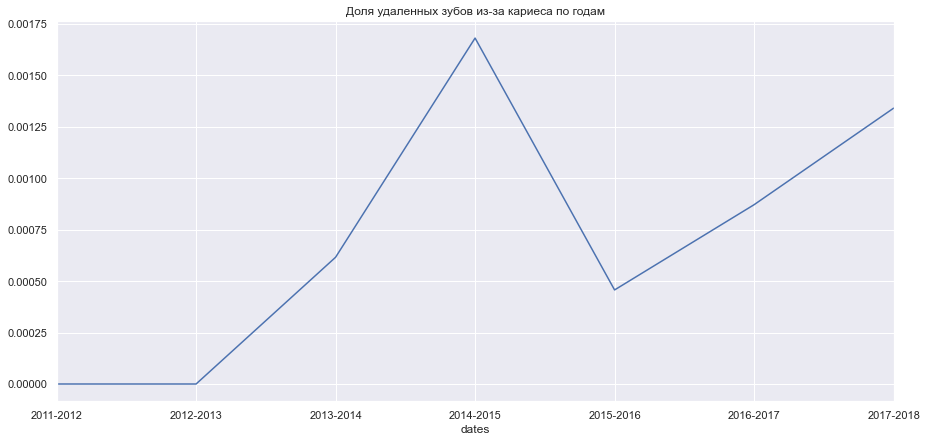

In [44]:
years_sum = data.groupby('dates').sum()
years_sum['counts'] = data['dates'].value_counts().sort_index()
years_sum['all_teeth_num_removed_caused_by_caries'] = years_sum[['num_removed_caused_by_caries', 'counts']].apply(lambda a: divide_all_teeth(a[0], a[1]), axis=1)
plt.figure(figsize=(15, 7))
years_sum['all_teeth_num_removed_caused_by_caries'].plot()
plt.title('Доля удаленных зубов из-за кариеса по годам')

## В Спб и Туле наблюдаем рост доли удаленных зубов, на Сев. Кавказе - уменьшение показателя. 

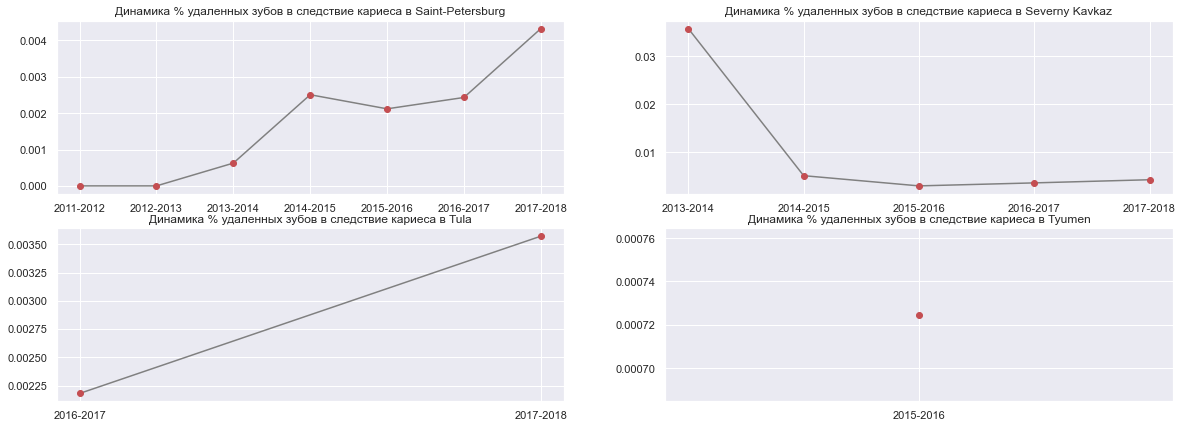

In [134]:
regions = ['Saint-Petersburg', 'Severny Kavkaz', 'Tula', 'Tyumen']
num_graphs = list(range(3))
column = 'all_teeth_num_removed_caused_by_caries'
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,7))
counter = 0
for row in [0, 1]:
    for col in [0, 1]:
        df = data[data['region']==regions[counter]]
        years_sum['counts'] = df['dates'].value_counts().sort_index()
        years_sum['all_teeth_num_removed_caused_by_caries'] = years_sum[['num_removed_caused_by_caries', 'counts']].apply(lambda a: divide_all_teeth(a[0], a[1]), axis=1)
        ax[row][col].set_title(f'Динамика % удаленных зубов в следствие кариеса в {regions[counter]}')
        ax[row][col].plot(years_sum[column], color='grey')
        ax[row][col].plot( years_sum[column], 'ro',)
        counter += 1

# Доля удаленных зубов по другим причинам

### В целом по всем городам, доля удаленных зубов не вследствие кариеса очень низкая, наблюдаем пик в 2014-2015 годах

Text(0.5, 1.0, 'Доля удаленных зубов(другие причины, кроме кариеса) по годам')

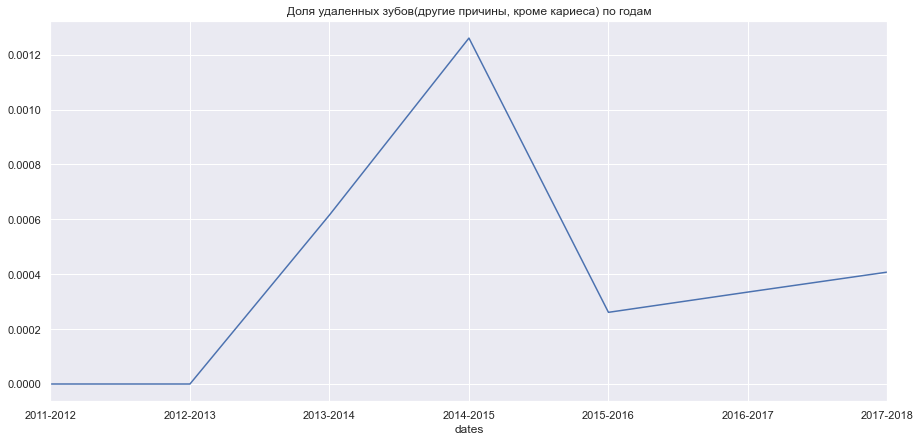

In [136]:
years_sum = data.groupby('dates').sum()
years_sum['counts'] = data['dates'].value_counts().sort_index()
years_sum['all_teeth_num_removed_other_reasons'] = years_sum[['num_removed_other_reasons', 'counts']].apply(lambda a: divide_all_teeth(a[0], a[1]), axis=1)
plt.figure(figsize=(15, 7))
years_sum['all_teeth_num_removed_other_reasons'].plot()
plt.title('Доля удаленных зубов(другие причины, кроме кариеса) по годам')


### Пик в общих данных был обусловлен выборкой из СПБ, в Туле и Тюмени за этот период данных нет, а в Северном Кавказе пиковый период пришелся на 2013-2014 гг.

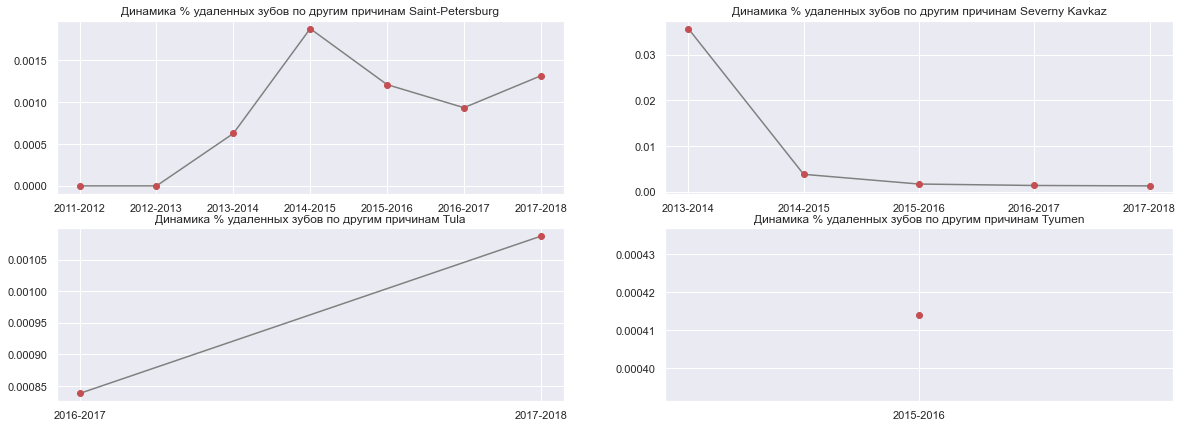

In [135]:
regions = ['Saint-Petersburg', 'Severny Kavkaz', 'Tula', 'Tyumen']
num_graphs = list(range(3))
column = 'all_teeth_num_removed_other_reasons'
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,7))
counter = 0
for row in [0, 1]:
    for col in [0, 1]:
        df = data[data['region']==regions[counter]]
        years_sum['counts'] = df['dates'].value_counts().sort_index()
        years_sum['all_teeth_num_removed_other_reasons'] = years_sum[['num_removed_other_reasons', 'counts']].apply(lambda a: divide_all_teeth(a[0], a[1]), axis=1)
        ax[row][col].set_title(f'Динамика % удаленных зубов по другим причинам {regions[counter]}')
        ax[row][col].plot(years_sum[column], color='grey')
        ax[row][col].plot( years_sum[column], 'ro',)
        counter += 1